In [31]:
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
warnings.filterwarnings("ignore")
import joblib
joblib.dump(tokenizer, "tokenizer.pkl")

['tokenizer.pkl']

In [15]:
data = pd.read_csv('/content/drive/MyDrive/SentimentAnalysis/IMDB_dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [16]:
data.shape

(50000, 2)

In [17]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [18]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [19]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [20]:
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0
49999,No one expects the Star Trek movies to be high...,0


In [21]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [22]:
train_data, test_data = train_test_split(data, test_size = 0.2, random_state=42)
train_data.shape

(40000, 2)

In [23]:
test_data.shape

(10000, 2)

In [24]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)
X_train

array([[1935,    1, 1200, ...,  205,  351, 3856],
       [   3, 1651,  595, ...,   89,  103,    9],
       [   0,    0,    0, ...,    2,  710,   62],
       ...,
       [   0,    0,    0, ..., 1641,    2,  603],
       [   0,    0,    0, ...,  245,  103,  125],
       [   0,    0,    0, ...,   70,   73, 2062]], dtype=int32)

In [25]:
X_test

array([[   0,    0,    0, ...,  995,  719,  155],
       [  12,  162,   59, ...,  380,    7,    7],
       [   0,    0,    0, ...,   50, 1088,   96],
       ...,
       [   0,    0,    0, ...,  125,  200, 3241],
       [   0,    0,    0, ..., 1066,    1, 2305],
       [   0,    0,    0, ...,    1,  332,   27]], dtype=int32)

In [26]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]
Y_train

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64

In [27]:
model = Sequential()
model.add(Embedding(input_dim =5000, output_dim = 128, input_length = 200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = "sigmoid"))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 771713 (2.94 MB)
Trainable params: 771713 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, Y_train, epochs = 4, batch_size = 64, validation_split = 0.2)

Epoch 1/4
500/500 [==============================] - 225s 444ms/step - loss: 0.1482 - accuracy: 0.9452 - val_loss: 0.3498 - val_accuracy: 0.8830
Epoch 2/4
500/500 [==============================] - 207s 414ms/step - loss: 0.1186 - accuracy: 0.9561 - val_loss: 0.3819 - val_accuracy: 0.8705
Epoch 3/4
500/500 [==============================] - 202s 404ms/step - loss: 0.1001 - accuracy: 0.9649 - val_loss: 0.4200 - val_accuracy: 0.8687
Epoch 4/4
500/500 [==============================] - 201s 401ms/step - loss: 0.0867 - accuracy: 0.9699 - val_loss: 0.4690 - val_accuracy: 0.8709


In [33]:
model.save("/content/drive/MyDrive/SentimentAnalysis/model.h5")

In [34]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 21s 65ms/step - loss: 0.4565 - accuracy: 0.8766
0.4564953148365021
0.8766000270843506


In [35]:
def predictive_system(review):
  sequences = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequences, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment


In [37]:
predictive_system("This movie was fantastic and amazing")

1/1 [==============================] - 0s 116ms/step


'positive'

In [38]:
predictive_system("A trilling adventure with stunning visual")

1/1 [==============================] - 0s 68ms/step


'positive'

In [39]:
predictive_system("A visual masterpiece")

1/1 [==============================] - 0s 110ms/step


'positive'

In [40]:
predictive_system("Overall long and slow")

1/1 [==============================] - 0s 124ms/step


'negative'

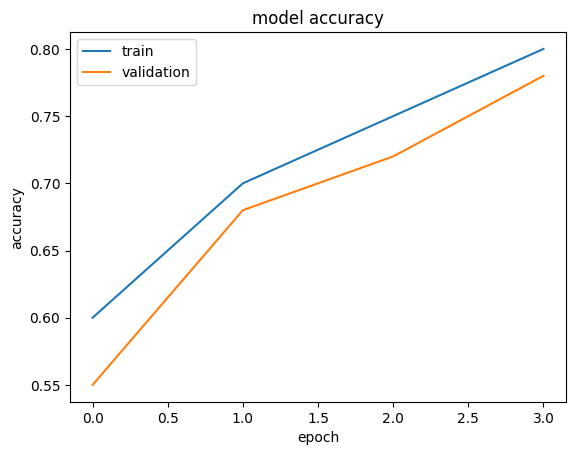

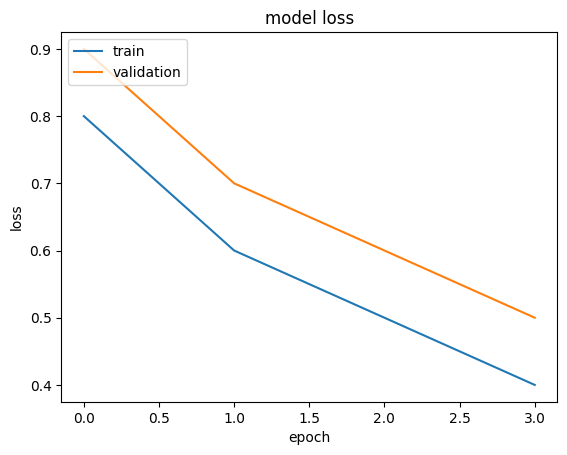

In [45]:
import matplotlib.pyplot as plt

# Assuming you have the following lists:
accuracy = [0.6, 0.7, 0.75, 0.8]
loss = [0.8, 0.6, 0.5, 0.4]
val_accuracy = [0.55, 0.68, 0.72, 0.78]
val_loss = [0.9, 0.7, 0.6, 0.5]

# summarize history for accuracy
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

313/313 [==============================] - 20s 65ms/step


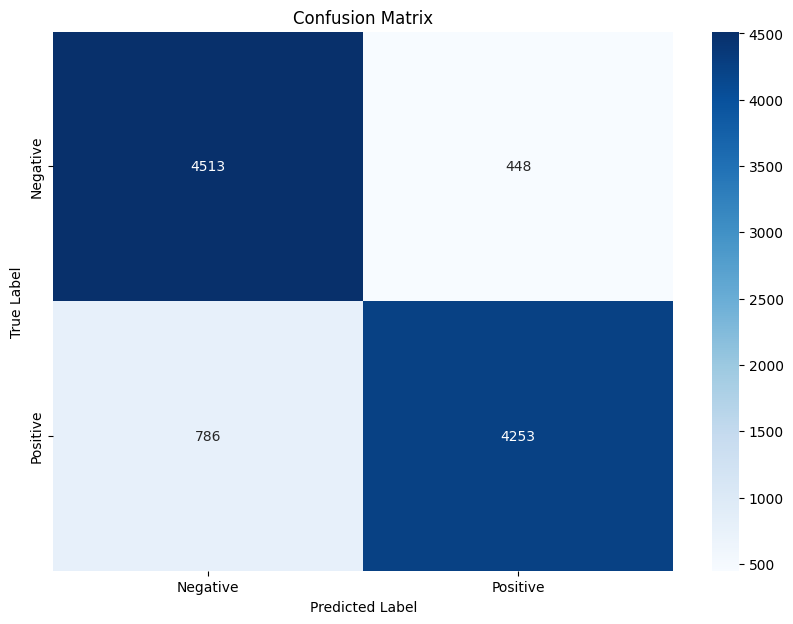

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

Y_pred = (model.predict(X_test) > 0.5).astype("int32")
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()